In [33]:
import pysal as ps
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from legendgram import legendgram
import palettable.matplotlib as mplpal
import numpy as np
from census import Census            
from us import states 
%matplotlib inline                     

In [31]:
api_key = "670c60e67279b6125d24adb8a5ab50638d3f1ac7"
c = Census(api_key)

In [8]:
a ="https://raw.githubusercontent.com/chuckzhuisme/my_first_repository/"
b = "master/Copy%20of%202014_2015_HS_SQR_Scores.csv"
hs_scores = a + b
clean_file = "https://raw.githubusercontent.com/linnaha/NYCdata/master/sat_zip_clean.csv"
var="https://raw.githubusercontent.com/chuckzhuisme/my_first_repository/" + \
"master/Copy%20of%202014_2015_HS_SQR_Results_Summary.csv"

satdf = pd.read_csv(hs_scores, encoding='latin-1') #file with standardized test scores
variabledf = pd.read_csv(var, encoding='latin-1') #file with performance variables
satdata = pd.read_csv(clean_file, encoding='latin-1') #seperate file with just zipcodes and sat scores

There are more than 90 columns. We will make a copy of the dataframe with the just the columns of the SAT scores and DBN. 

In [74]:
df = satdata[['DBN', 'School Name', 'Average Score SAT Math','Average Score SAT Critical Reading', \
             'Average Score SAT Writing']].copy()
col_list= list(df)
col_list.remove('DBN')
col_list.remove('School Name')
col_list
df['Average SAT Score for Three sections'] = df[col_list].sum(axis=1)
df.head()

,DBN,School Name,Average Score SAT Math,Average Score SAT Critical Reading,Average Score SAT Writing,Average SAT Score for Three sections
0,01M292,Henry Street School for International Studies,410,406,381,1197
1,01M448,University Neighborhood High School,437,355,352,1144
2,01M450,East Side Community School,454,428,445,1327
3,01M509,Marta Valle High School,438,413,394,1245
4,01M539,"New Explorations into Science, Technology and ...",657,601,601,1859


Secondly, we will merge the dataframe with the second excel tab which includes different quality metrics.

In [9]:
#we may want to rename columns
#satdf = satdf.rename(columns={'School Name':'name',"Average Score SAT Math":"avg_math","Average Score SAT Critical Reading":"avg_read","Average Score SAT Writing":"avg_write","Average SAT Score for Three sections":"avg_sat"})
satdata = satdata.rename(columns={'School Name':'name',"Average Score SAT Math":"avg_math","Average Score SAT Critical Reading":"avg_read","Average Score SAT Writing":"avg_write","Average SAT Score for Three sections":"avg_sat"})

In [10]:
satdf_top = satdata[["name","avg_math","avg_read","avg_write","avg_sat","borough","zip"]].copy()
satdf_top.sort_values(by="avg_sat",ascending=False, inplace=True)

In [11]:
code = ("B19013_001E") 
#code for median houshold income
    
zip_2015 = pd.DataFrame(c.acs5.get(code, 
                                         {'for': "zip code tabulation area:*"}, year=2015))
#the * will get all the zipcodes. Then we will merge so that only the zipcodes that are in  our dataset will appear.

In [12]:
zip_2015 = zip_2015.rename(columns={'zip code tabulation area':'zip', 
                                    'B19013_001E':'avg_income'})

In order to merge the datasets, we must first change the dtypes to be the same.

In [13]:
zip_2015['zip'] = zip_2015['zip'].astype(str).astype(int) 

In [14]:
income_satdf = pd.merge(satdf_top,zip_2015,   
                     how='left',      # will merge with only the data in the left, which is our satdf_top
                 on='zip',       
                 indicator=True) 
income_satdf.head()

,name,avg_math,avg_read,avg_write,avg_sat,borough,zip,avg_income,_merge
0,Stuyvesant High School,754,697,693,2144,New_York,10282,250001.0,both
1,Bronx High School of Science,714,660,667,2041,Bronx,10468,34784.0,both
2,Staten Island Technical High School,711,660,670,2041,Staten_Island,10306,79686.0,both
3,High School of American Studies at Lehman College,669,672,672,2013,Bronx,10468,34784.0,both
4,Townsend Harris High School,680,640,661,1981,Queens,11367,56557.0,both


Shape File Path:

In [15]:
path = "/Users/linnaha/Downloads/"

zip_file = path + "ZIP_CODE_040114" #this is for mac users

In [16]:
test = gpd.read_file(zip_file)
zipmap = pd.DataFrame(test)

In [17]:
test = test.rename(columns={'ZIPCODE':'zip'})
test['zip'] = test['zip'].astype(str).astype(int) #must change dtype from object to integer
test["zip"].dtypes #now that the zip is an integer, we can merge 

dtype('int64')

In [18]:
zipmap  = test.merge(income_satdf, on='zip', how = "outer")
zipmap.head()

,zip,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,SHAPE_LEN,geometry,name,avg_math,avg_read,avg_write,avg_sat,borough,avg_income,_merge
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",Pathways in Technology Early College High Scho...,446.0,442.0,410.0,1298.0,Brooklyn,34701.0,both
2,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",KIPP AMP Charter School,452.0,411.0,418.0,1281.0,Brooklyn,34701.0,both
3,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",Academy for Health Careers,406.0,405.0,396.0,1207.0,Brooklyn,34701.0,both
4,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",Boys and Girls High School,399.0,392.0,394.0,1185.0,Brooklyn,34701.0,both


/Users/linnaha/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


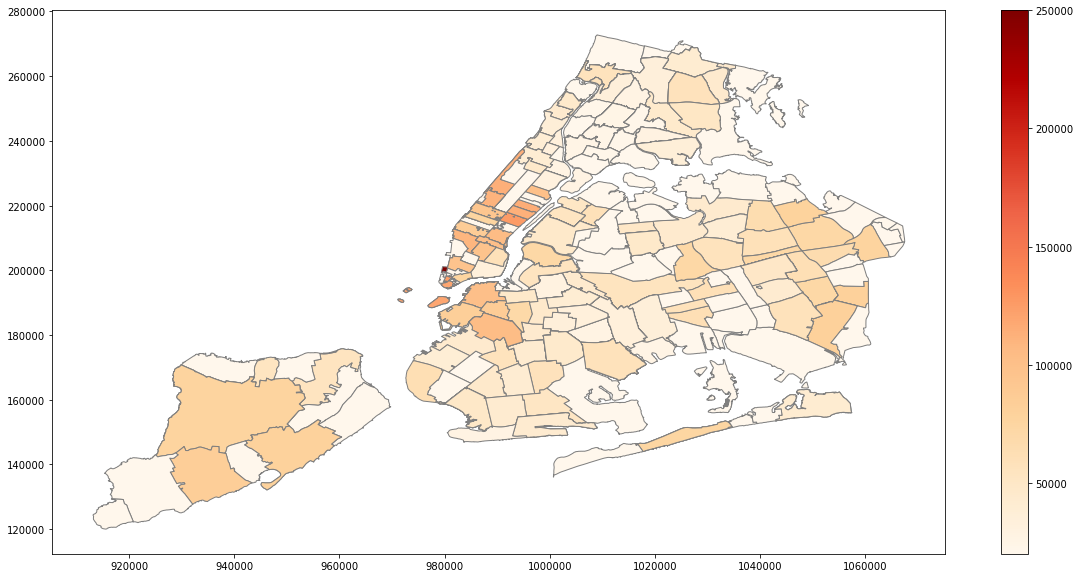

In [51]:
fig, ax = plt.subplots(figsize = (20,10))

# First create the map for NYC
######################################################################################
# Then lets create the map for income

zipmap.plot(ax = ax, edgecolor='tab:grey', k =14,
             column='avg_income',
            cmap='OrRd', alpha = 1.0, legend = True )

In [52]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
output_notebook()


Loading BokehJS ...

In [61]:
zipmap1 = zipmap["geometry"].copy()
zipmap1.columns

AttributeError: 'GeoSeries' object has no attribute 'columns'

In [64]:
zip_Source = convert_GeoPandas_to_Bokeh_format(zipmap)

AttributeError: ("'Polygon' object has no attribute 'geoms'", 'occurred at index 0')

In [58]:
def convert_GeoPandas_to_Bokeh_format(gdf):
    """
    Function to convert a GeoPandas GeoDataFrame to a Bokeh
    ColumnDataSource object.
    
    :param: (GeoDataFrame) gdf: GeoPandas GeoDataFrame with polygon(s) under
                                the column name 'geometry.'
                                
    :return: ColumnDataSource for Bokeh.
    """
    gdf_new = gdf.drop('geometry', axis=1).copy()
    gdf_new['x'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='x', 
                             shape_type='polygon', 
                             axis=1)
    
    gdf_new['y'] = gdf.apply(getGeometryCoords, 
                             geom='geometry', 
                             coord_type='y', 
                             shape_type='polygon', 
                             axis=1)
    
    return ColumnDataSource(gdf_new)


def getGeometryCoords(row, geom, coord_type, shape_type):
    """
    Returns the coordinates ('x' or 'y') of edges of a Polygon exterior.
    
    :param: (GeoPandas Series) row : The row of each of the GeoPandas DataFrame.
    :param: (str) geom : The column name.
    :param: (str) coord_type : Whether it's 'x' or 'y' coordinate.
    :param: (str) shape_type
    """
    
    # Parse the exterior of the coordinate
    if shape_type == 'polygon':
        exterior = row[geom].geoms[0].exterior
        if coord_type == 'x':
            # Get the x coordinates of the exterior
            return list( exterior.coords.xy[0] )    
        
        elif coord_type == 'y':
            # Get the y coordinates of the exterior
            return list( exterior.coords.xy[1] )

    elif shape_type == 'point':
        exterior = row[geom]
    
        if coord_type == 'x':
            # Get the x coordinates of the exterior
            return  exterior.coords.xy[0][0] 

        elif coord_type == 'y':
            # Get the y coordinates of the exterior
            return  exterior.coords.xy[1][0]

/Users/linnaha/anaconda/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/linnaha/anaconda/lib/python3.6/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/linnaha/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


TypeError: len() of unsized object

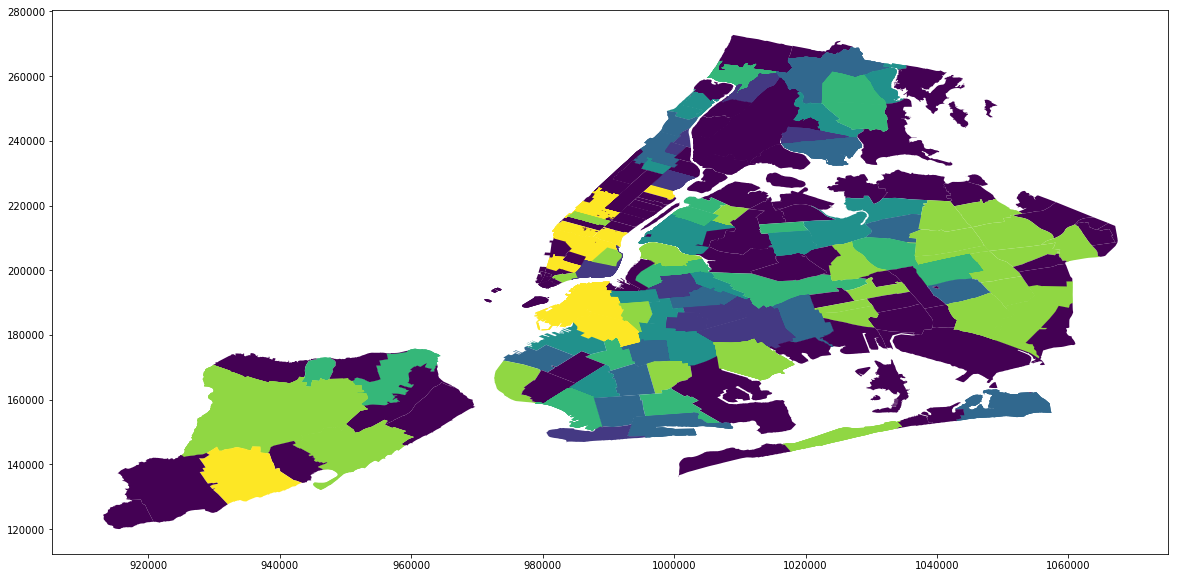

In [27]:
#data = gpd.read_file(zip_file)
#data.crs = {'init': 'epgs:4269'}
#data.to_crs(epsg=5070)
fig, ax = plt.subplots(figsize = (20,10))
zipmap.plot('avg_income', k=10, ax=ax, scheme='Quantiles')
bins = ps.Quantiles(zipmap['avg_income'].values, k=10).bins
ax.hist(zipmap.dropna())

legendgram(fig,ax,zipmap['avg_income'],bins,pal=palmpl.Viridis_10,
               legend_size=(.5,.2), # legend size in fractions of the axis
               loc = 'upper left' # matplotlib-style legend locations
gdf.crs = {'init':'epsg:4269'}
gdf = gdf.to_crs(epsg=5070)               )

In [38]:
gdf  =zipmap
gdf.crs = {'init':'epsg:4269'}
gdf = gdf.to_crs(epsg=5070)
ax.hist(zipmap.dropna())
ax = gdf.plot("avg_income")
ax.axis('off')

legendgram(plt.gcf(), # grab the figure, we need it
           plt.hist(conv0.numpy(), bins=100),
           ax, # the axis to add the legend
           gdf.avg_income, # the attribute to map
           np.percentile(gdf.avg_income, np.arange(10,110,10)), # the breaks to induce color differences on
           mplpal.Viridis_10 # the palette to use
          )

TypeError: len() of unsized object

In [42]:
import bokeh.sampledata
bokeh.sampledata.download()
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment



Using data directory: /Users/linnaha/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_expectancy.csv (73243 bytes)
     73243 [100.00%]
Downloading

In [44]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

output_notebook()


Loading BokehJS ...

In [45]:

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "ny"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)